In [19]:
import linear_regression as lr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("datasets/advertising.csv")
df.shape

(200, 4)

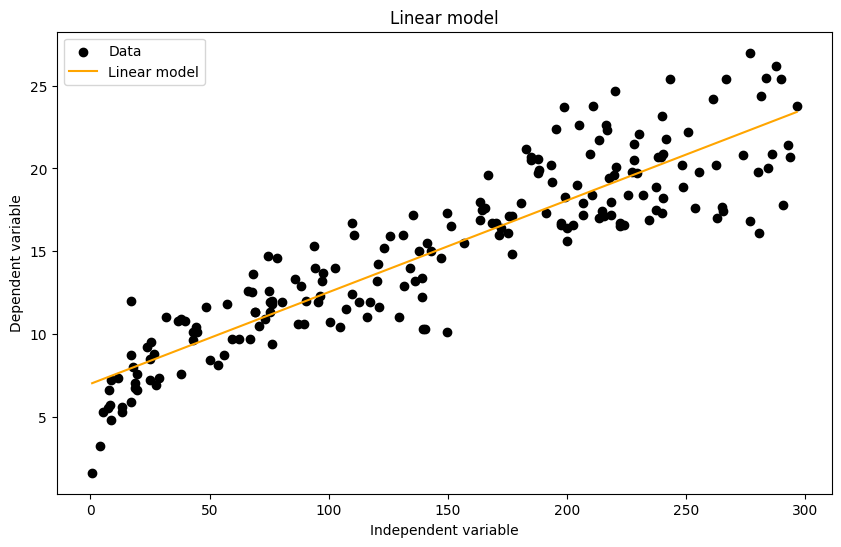

In [5]:
model1_x = df["TV"].values
model1_y = df["Sales"].values

model1 = lr.LinearRegression(x=model1_x, y=model1_y)

model1.plot_linear_model_line()

Analysis of variance identity breakdown:
  - total sum of squares (SST): 5555.98,
  - regression sum of squares (SSR): 4512.44,
  - residual sum of squares (SSRes): 1043.55,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The F-statistic is: 856.18
The 0.95 quantile of the F-distribution with 1 and 198 degrees of freedom is: 3.89
The model is significant; the hypothesis H0: b1 = 0 is rejected.

The figure below shows the PDF for the F(1, n-2) distribution, and the value of the F-statistic, along with the 95% quantile.


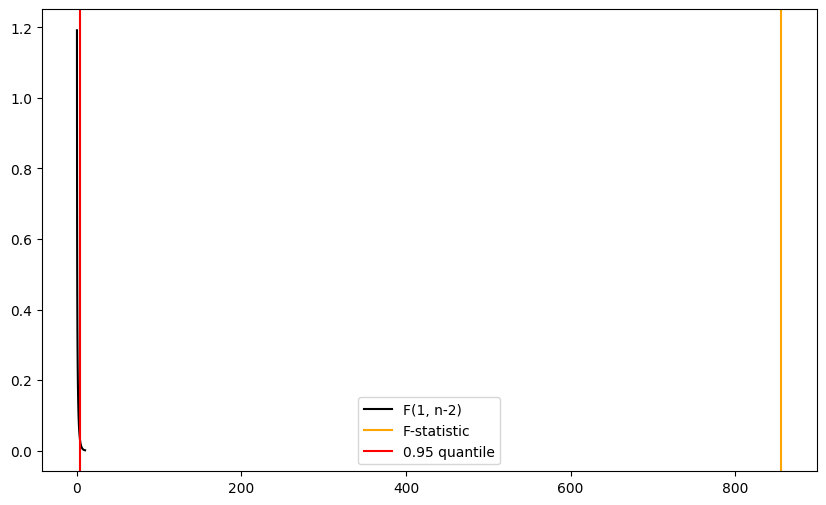

In [6]:
model1.analysis_of_variance()

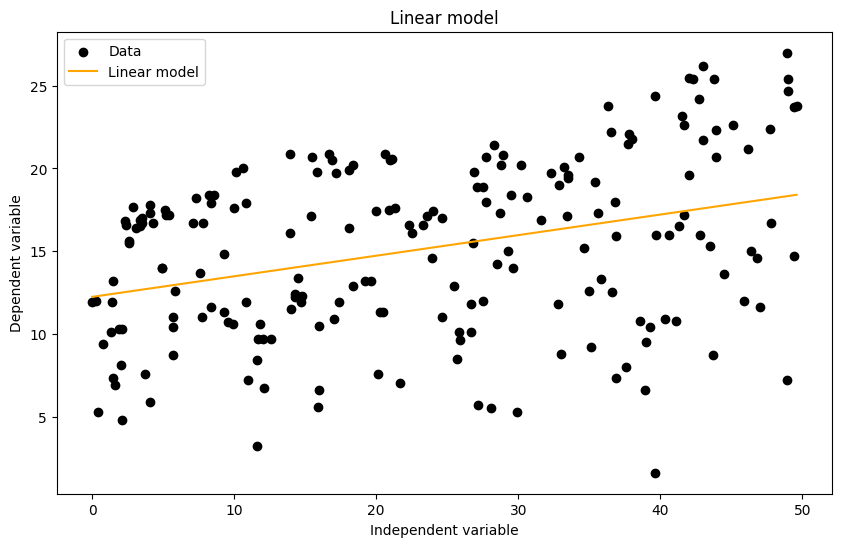

In [7]:
model2_x = df["Radio"].values
model2_y = df["Sales"].values

model2 = lr.LinearRegression(x=model2_x, y=model2_y)

model2.plot_linear_model_line()

Analysis of variance identity breakdown:
  - total sum of squares (SST): 5555.98,
  - regression sum of squares (SSR): 679.17,
  - residual sum of squares (SSRes): 4876.81,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The F-statistic is: 27.57
The 0.95 quantile of the F-distribution with 1 and 198 degrees of freedom is: 3.89
The model is significant; the hypothesis H0: b1 = 0 is rejected.

The figure below shows the PDF for the F(1, n-2) distribution, and the value of the F-statistic, along with the 95% quantile.


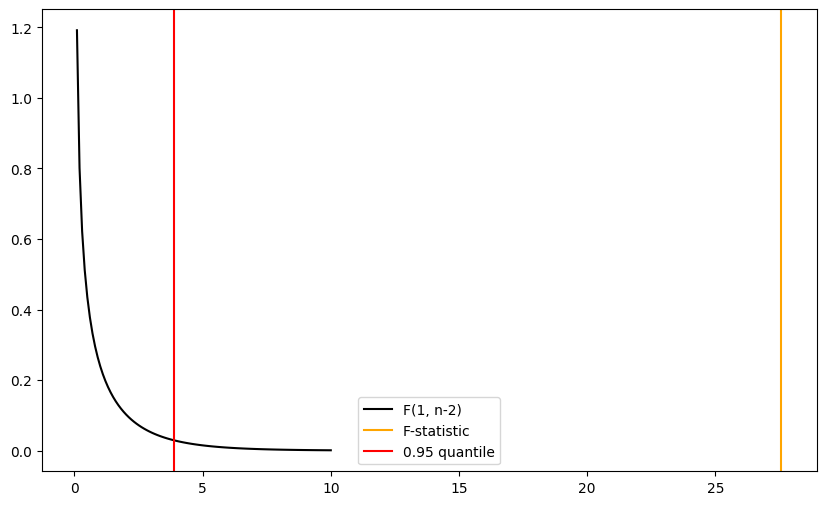

In [8]:
model2.analysis_of_variance()

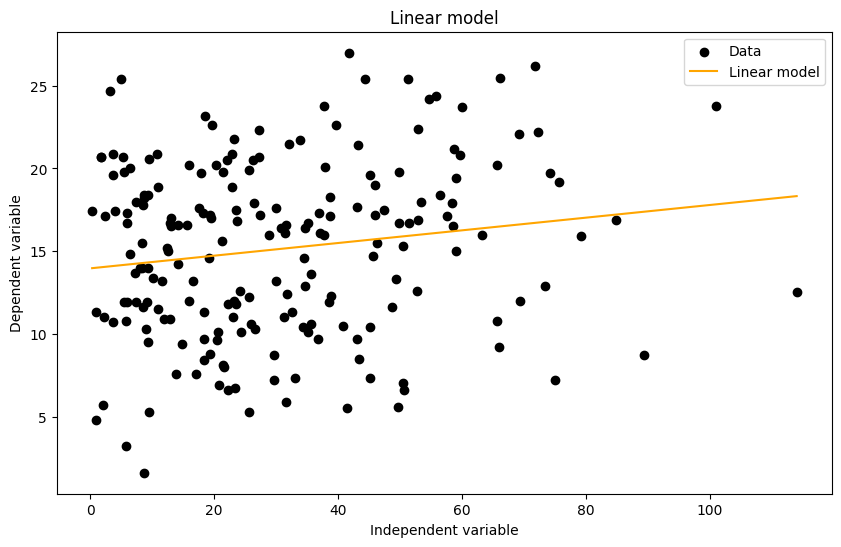

In [9]:
model3_x = df["Newspaper"].values
model3_y = df["Sales"].values

model3 = lr.LinearRegression(x=model3_x, y=model3_y)

model3.plot_linear_model_line()

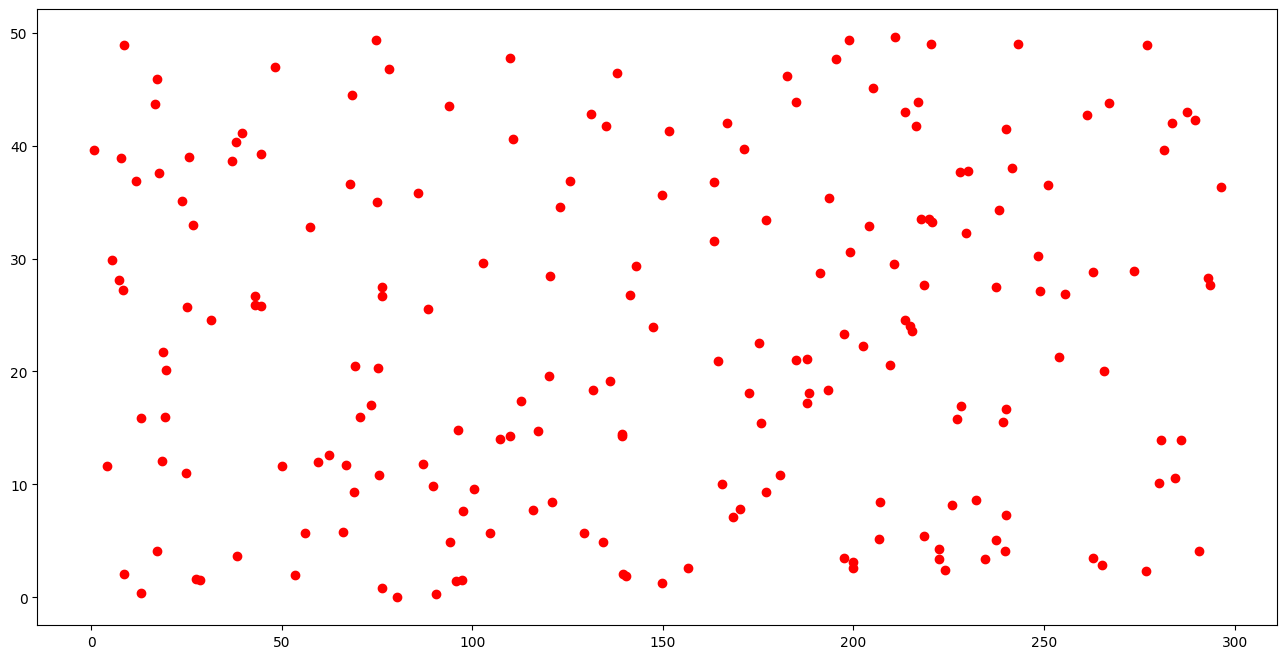

In [10]:
plt.figure(figsize=(16, 8))

plt.scatter(model1_x, model2_x, color="red", label="TV vs Radio")

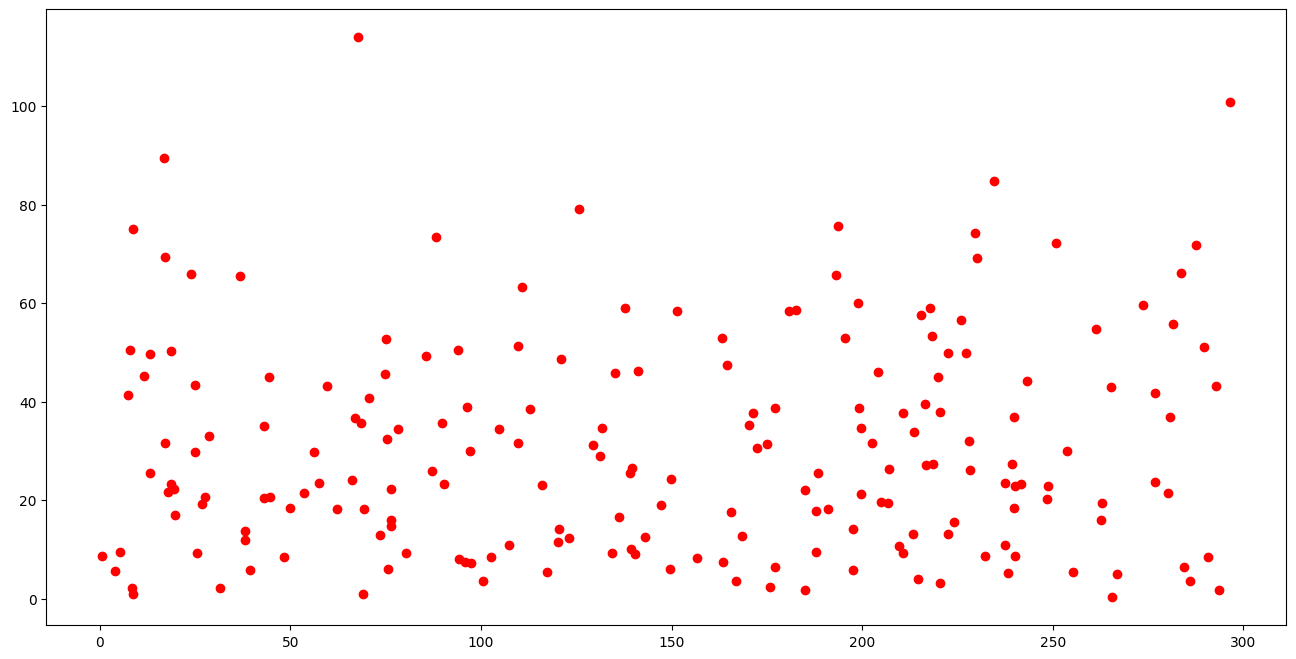

In [11]:
plt.figure(figsize=(16, 8))

plt.scatter(model1_x, model3_x, color="red", label="TV vs Newspaper")

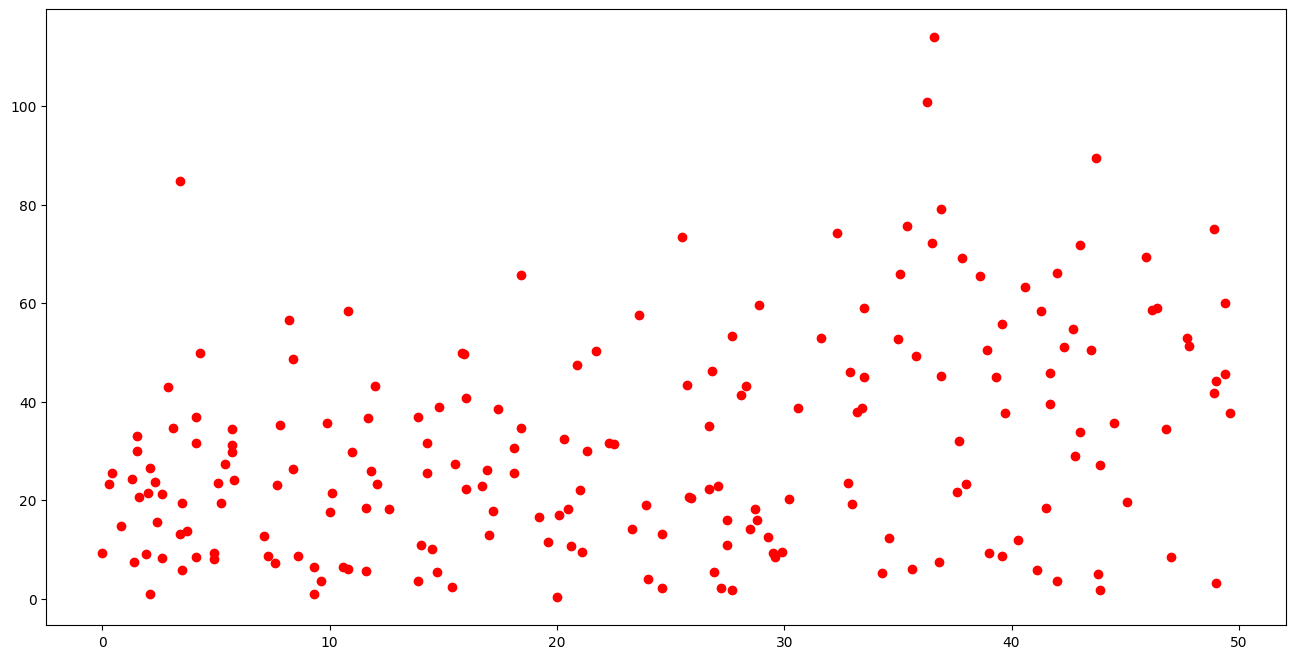

In [12]:
plt.figure(figsize=(16, 8))

plt.scatter(model2_x, model3_x, color="red", label="Radio vs Newspaper")

Analysis of variance identity breakdown:
  - total sum of squares (SST): 5555.98,
  - regression sum of squares (SSR): 5014.78,
  - residual sum of squares (SSRes): 541.20,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The H0 hypothesis being tested is: b1 = b2 = ... = bp = 0.
The F-statistic is: 608.47
The 0.95 quantile of the F-distribution with 2 and 197 degrees of freedom is: 3.04
The model is significant; the hypothesis H0: b1 = b2 = ... = bp = 0 is rejected.

The figure below shows the PDF for the F(p-1, n-p) distribution, and the value of the F-statistic, along with the 95% quantile.


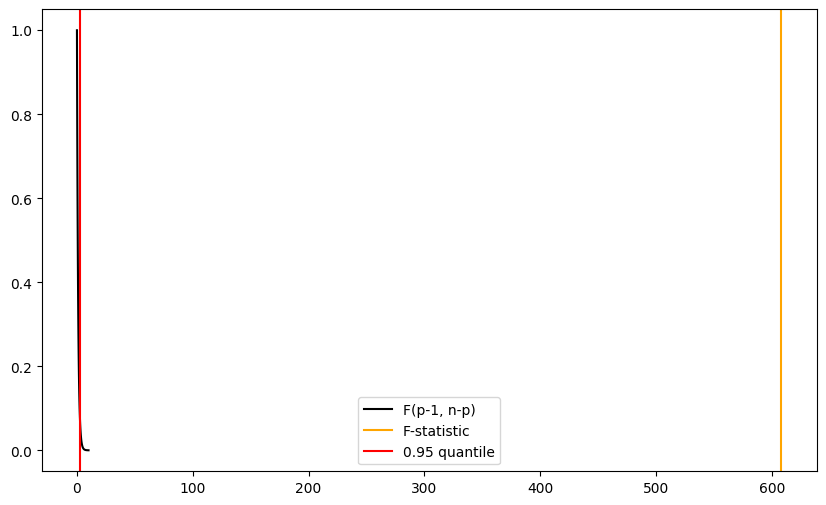

In [14]:
model = lr.MultipleLinearRegression(X=df[["TV", "Radio", "Newspaper"]].values, y=df["Sales"].values)

model.analysis_of_variance()

In [15]:
model.coefficient_of_determination_analysis()

{'r2': 0.9025912899684378, 'r2_adj': 0.9016023690544118}

In [16]:
model1.coefficient_of_determination()

0.8121757029987409

In [17]:
model2.coefficient_of_determination()

0.12224190399478499

In [18]:
model3.coefficient_of_determination()

0.024951369862865218

In [20]:
data = pd.read_csv("datasets/insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


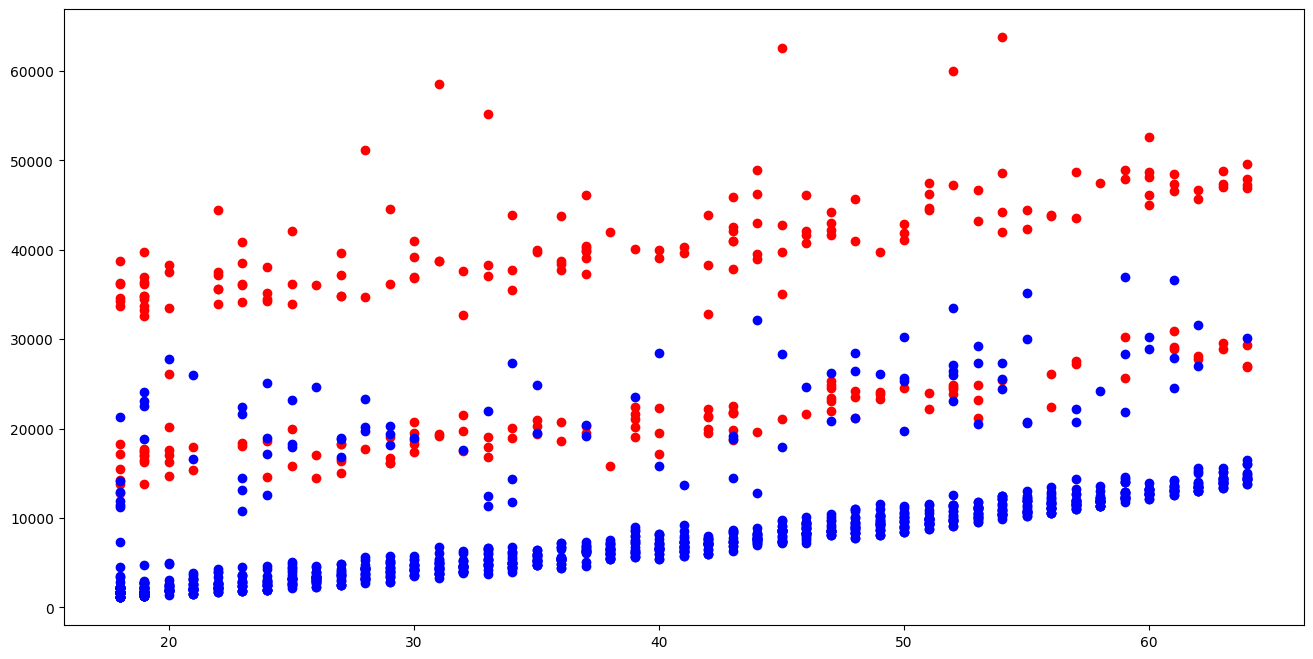

In [26]:
plt.figure(figsize=(16, 8))

plt.scatter(data.loc[data["smoker"] == "yes"]["age"], data.loc[data["smoker"] == "yes"]["charges"], color="red", label="Smoker")
plt.scatter(data.loc[data["smoker"] == "no"]["age"], data.loc[data["smoker"] == "no"]["charges"], color="blue", label="Non Smoker")

<Axes: xlabel='region'>

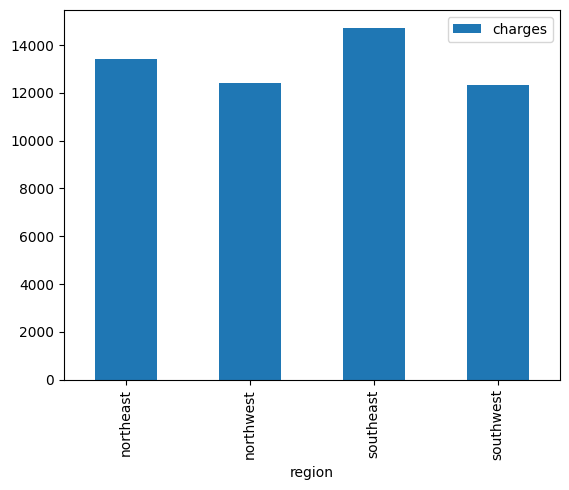

In [29]:
data.groupby("region").agg({
    "charges": "mean"
}).plot(kind="bar")

<Axes: xlabel='bmi', ylabel='charges'>

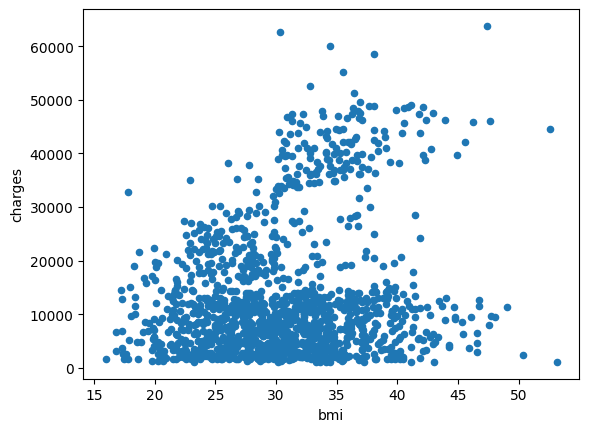

In [30]:
data.plot(x="bmi", y="charges", kind="scatter")

<Axes: xlabel='children'>

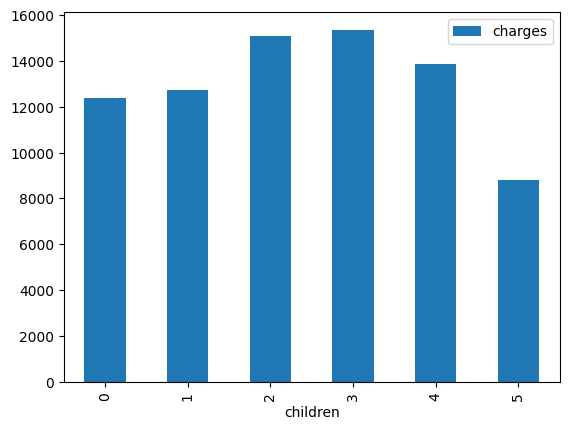

In [31]:
data.groupby("children").agg({
    "charges": "mean"
}).plot(kind="bar")

In [32]:
performance = pd.read_csv("datasets/Student_Performance.csv")

performance.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

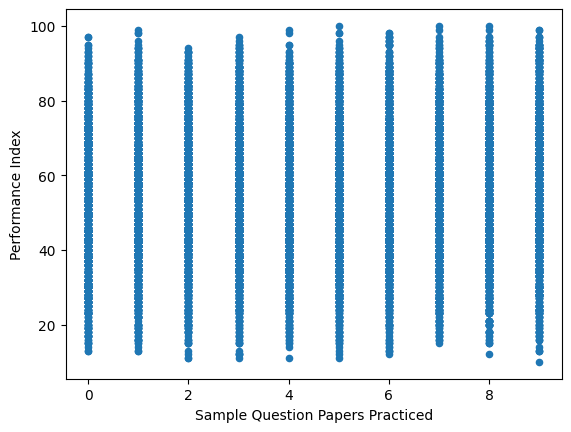

In [37]:
performance.plot(x="Sample Question Papers Practiced", y="Performance Index", kind="scatter")

<Axes: xlabel='Sample Question Papers Practiced'>

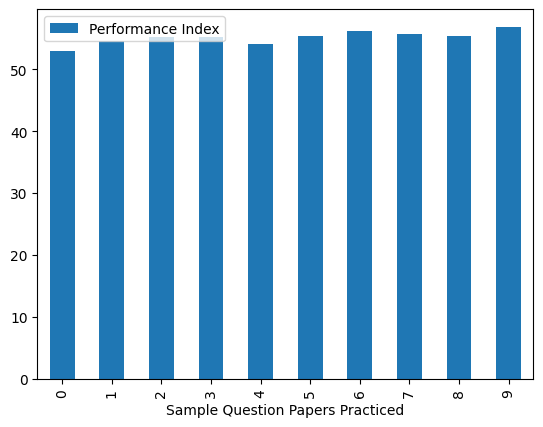

In [38]:
performance.groupby("Sample Question Papers Practiced").agg({
    "Performance Index": "mean"
}).plot(kind="bar")